# VoxelMorph Tutorial : 3D MRI Example

##### Reference : https://colab.research.google.com/drive/1WiqyF7dCdnNBIANEY80Pxw_mVz4fyV-S?usp=sharing#scrollTo=hDzrcDyTPXNm

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import tensorflow as tf
import voxelmorph as vxm #registration
import neurite as ne #medical image analysis

## 1. Model Generation

In [2]:
# our data will be of shape 160 x 192 x 224
vol_shape = (160, 192, 224)
nb_features = [
    [16, 32, 32, 32],
    [32, 32, 32, 32, 32, 16, 16]
]

In [3]:
# build vxm network
vxm_model = vxm.networks.VxmDense(vol_shape, nb_features, int_steps=0)

Instructions for updating:
Use fn_output_signature instead
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


## 2. Validation Data

In [4]:
# Validation Data
val_volume_1 = np.load('./data/tutorial/subj1.npz')['vol']
val_volume_2 = np.load('./data/tutorial/subj2.npz')['vol']

val_input = [
    val_volume_1[np.newaxis, ..., np.newaxis],
    val_volume_2[np.newaxis, ..., np.newaxis]
]

## 3. Training

In [5]:
vxm_model.load_weights('./data/tutorial/brain_3d.h5')

## 4. Validation

In [6]:
val_pred = vxm_model.predict(val_input)

In [7]:
moved_pred = val_pred[0].squeeze()
pred_warp = val_pred[1]

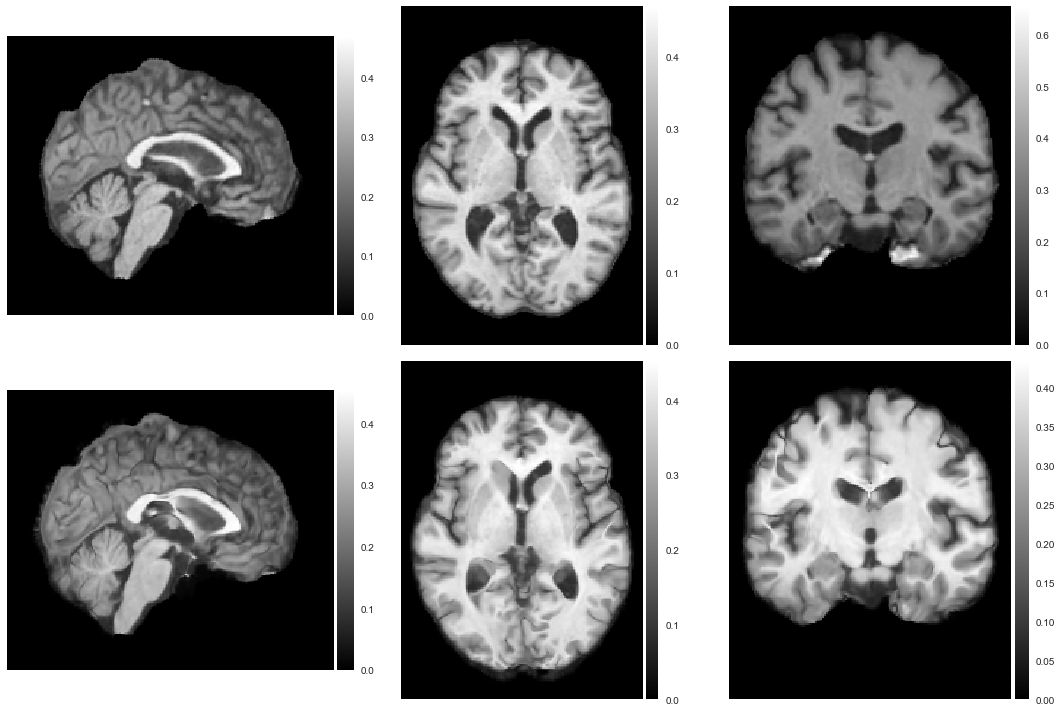

(<Figure size 1080x720 with 12 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

In [8]:
mid_slices_fixed = [np.take(val_volume_2, vol_shape[d]//2, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_pred = [np.take(moved_pred, vol_shape[d]//2, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[2,3])